In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import datetime
from numpy import inf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import model_selection

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
training_dataset = pd.read_csv('../2_database/data_processing/02_data_processing_03_training_dataset.csv',
                              sep=';')

validation_dataset = pd.read_csv('../2_database/data_processing/02_data_processing_04_validation_dataset.csv',
                                sep=';')

In [3]:
training_dataset.head()

,pct_pol_neg,pct_pol_pos,pct_pol_neu,state,education_var_01_qt_pct,family_var_01_adequada_pct,family_var_01_semi_adequada_pct,family_var_01_inadequada_pct,fertility_var_01_has_children_pct,fertility_var_01_children_born_pct,...,work_var_01_irregular_pct,social_indicator_var_01_15_to_24_years_pct,social_indicator_var_01_25_to_59_years_pct,social_indicator_var_01_60_to_more_years_pct,social_indicator_var_02_suitable_pct,social_indicator_var_02_semi_suitable_pct,social_indicator_var_02_inappropriate_pct,social_indicator_var_03_responsable_illiterate_pct,social_indicator_var_03_inappropriate_residence_pct,social_indicator_var_03_responsable_illiterate_and_inappropriate_residence_pct
0,0.018576,0.029370,0.953309,sp,0.975146,0.771346,1.100852,3.460448,0.991619,1.116080,...,0.513035,1.991453,1.984716,1.478971,0.821663,1.137876,3.573529,2.017544,3.906667,7.727273
1,0.014563,0.028014,0.959195,pe,0.977967,0.156153,1.301859,8.095948,0.899278,1.155976,...,0.416151,2.363049,1.490483,1.137173,0.213576,1.279340,4.126743,1.578146,4.522596,6.335556
2,0.023637,0.035859,0.943328,sp,1.045255,0.813104,1.349589,4.570161,0.957922,1.069060,...,0.606255,2.329897,1.584906,1.420379,0.926863,0.330832,4.094675,2.217082,3.825273,7.467742
3,0.013638,0.026332,0.960974,ce,1.023528,0.053283,0.898975,2.613556,0.976104,1.156115,...,0.552008,2.685007,1.426546,1.142308,0.130391,0.664473,1.813720,1.281789,1.979155,2.094926
4,0.016828,0.045385,0.939317,sp,0.785903,0.499677,1.276335,8.326532,1.060698,1.136891,...,0.349636,2.551136,1.193137,1.351345,0.824570,0.364026,8.006608,1.356146,19.192547,5.543210


In [4]:
training_dataset = pd.concat([
    training_dataset.reset_index(drop = True),
    pd.get_dummies(training_dataset['state'], prefix = 'state')
], axis = 1)

validation_dataset = pd.concat([
    validation_dataset.reset_index(drop = True),
    pd.get_dummies(validation_dataset['state'], prefix = 'state')
], axis = 1)

training_dataset = training_dataset.drop(columns=['state'])
validation_dataset = validation_dataset.drop(columns=['state'])

In [5]:
training_dataset[training_dataset == inf] = 50
validation_dataset[validation_dataset == inf] = 50

In [7]:
training_dataset.head()

,pct_pol_neg,pct_pol_pos,pct_pol_neu,education_var_01_qt_pct,family_var_01_adequada_pct,family_var_01_semi_adequada_pct,family_var_01_inadequada_pct,fertility_var_01_has_children_pct,fertility_var_01_children_born_pct,fertility_var_01_children_borned_live_pct,...,state_pr,state_rj,state_rn,state_ro,state_rr,state_rs,state_sc,state_se,state_sp,state_to
0,0.018576,0.029370,0.953309,0.975146,0.771346,1.100852,3.460448,0.991619,1.116080,1.096923,...,0,0,0,0,0,0,0,0,1,0
1,0.014563,0.028014,0.959195,0.977967,0.156153,1.301859,8.095948,0.899278,1.155976,1.152184,...,0,0,0,0,0,0,0,0,0,0
2,0.023637,0.035859,0.943328,1.045255,0.813104,1.349589,4.570161,0.957922,1.069060,1.070987,...,0,0,0,0,0,0,0,0,1,0
3,0.013638,0.026332,0.960974,1.023528,0.053283,0.898975,2.613556,0.976104,1.156115,1.157691,...,0,0,0,0,0,0,0,0,0,0
4,0.016828,0.045385,0.939317,0.785903,0.499677,1.276335,8.326532,1.060698,1.136891,1.112883,...,0,0,0,0,0,0,0,0,1,0


In [9]:
array = training_dataset.iloc[:, np.r_[0, 3:52]].values

X_training = array[:, 1:]
Y_training = array[:, 0]

In [10]:
####### parameters for models' tests ######
scoring='neg_mean_squared_error'
n_splits=5
###########################################

models = []

models.append(('Linear Regression', LinearRegression()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Support Vector Machine', SVR()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))

Linear Regression 2019-05-21 21:49:00.925772
Random Forest 2019-05-21 21:49:01.023582


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

Support Vector Machine 2019-05-21 21:49:01.258561
Gradient Boosting 2019-05-21 21:49:01.275393


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

The End - 2019-05-21 21:49:01.771521


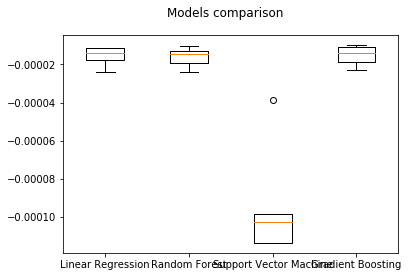

In [11]:
# prepare configuration for cross validation
seed = 7

# evaluate each model in turn
results = []
names = []

for model_name, model in models:
    print(model_name + ' ' + str(datetime.datetime.now()))
    kfold = model_selection.KFold(n_splits=n_splits,
                                  random_state=seed)
    cv_results = model_selection.cross_val_score(model,
                                                 X_training,
                                                 Y_training,
                                                 cv=kfold,
                                                 scoring=scoring)
    results.append(cv_results)
    names.append(model_name)

print('The End - ' + str(datetime.datetime.now()))

# boxplot models comparison
fig = plt.figure()
fig.suptitle('Models comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Tests with models

In [12]:
array = validation_dataset.iloc[:, np.r_[0, 3:52]].values

X_validation = array[:, 1:]
Y_validation = array[:, 0]

In [13]:
model = GradientBoostingRegressor(n_estimators=1000,
                                  learning_rate=0.01,
                                  max_depth=2)
model.fit(X_training, Y_training)

y_training_pred = model.predict(X_training)
y_validation_pred = model.predict(X_validation)

print("R2 training: " + str(r2_score(Y_training, y_training_pred)) + "\n" + 
      "R2 validation: " + str(r2_score(Y_validation, y_validation_pred)))

R2 training: 0.5727917772037274
R2 validation: 0.02506270529716681


In [17]:
#plt.scatter(Y_training, y_training_pred)
#plt.scatter(Y_validation, y_validation_pred)

In [23]:
model = LinearRegression()
model.fit(X_training, Y_training)

y_training_pred = model.predict(X_training)
y_validation_pred = model.predict(X_validation)

print("R2 training: " + str(r2_score(Y_training, y_training_pred)) + "\n" + 
      "R2 validation: " + str(r2_score(Y_validation, y_validation_pred)))

R2 training: 0.1864014868375533
R2 validation: -2.0595774985362922


In [152]:
'{0:.10f}'.format(np.sqrt(mean_squared_error(Y_training, y_training_pred)))

'0.0017952835'

In [154]:
'{0:.10f}'.format(np.sqrt(mean_squared_error(Y_validation, y_validation_pred)))

'0.0043068222'

In [157]:
y_test_coin = np.random.randint(7, 20, size=127) * 0.001

'{0:.10f}'.format(np.sqrt(mean_squared_error(Y_validation, y_test_coin)))

'0.0054745997'

In [135]:
y_test_coin = np.random.randint(7, 20, size=127) * 0.001

r2_score(Y_validation, y_test_coin)

-0.9594739337397147